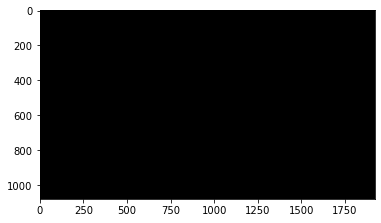

There are 0 set to 255


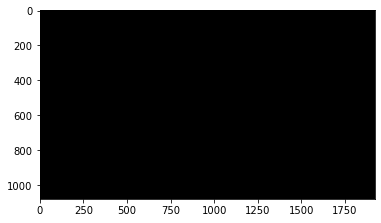

There are 0 set to 255


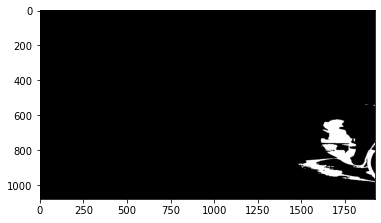

There are 45715 set to 255


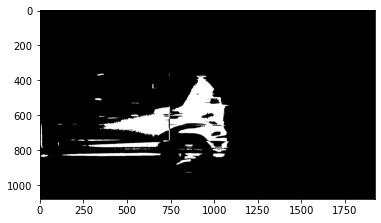

There are 124429 set to 255


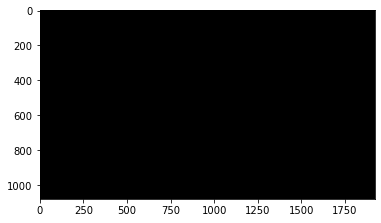

There are 0 set to 255


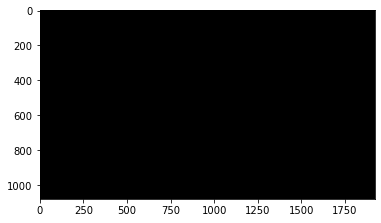

There are 0 set to 255


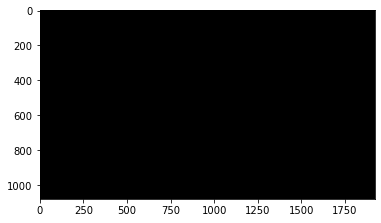

There are 0 set to 255


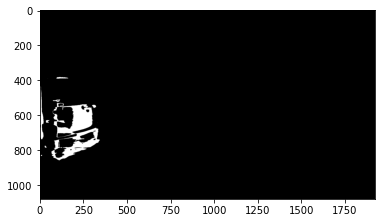

There are 41145 set to 255


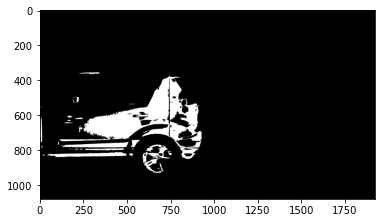

There are 138784 set to 255


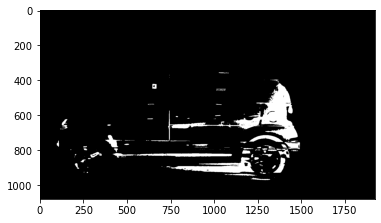

There are 100284 set to 255


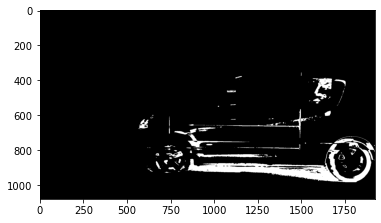

There are 97886 set to 255


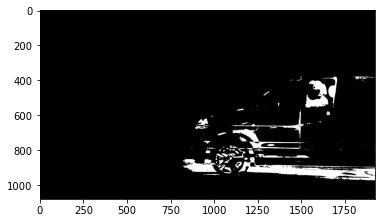

There are 91484 set to 255


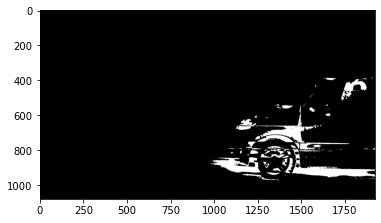

There are 81780 set to 255


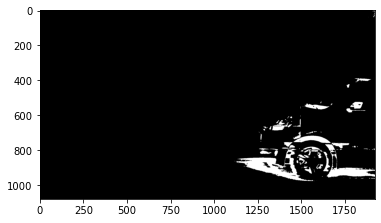

There are 62982 set to 255


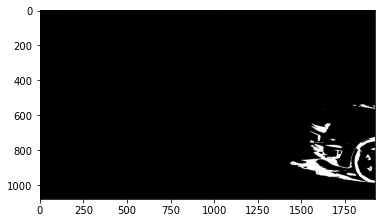

There are 35623 set to 255


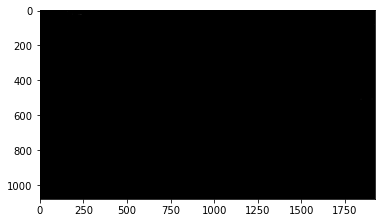

There are 14 set to 255


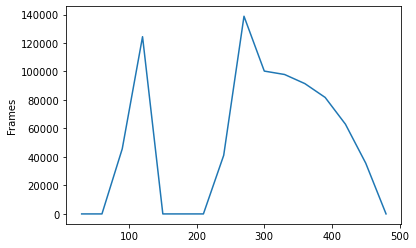

Summary:
2 vehicles have passed through the screen
The 1 vehicle must have been a small car
The 2 vehicle must have been a small car


In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

cap = cv2.VideoCapture('../datasets/daihatsu_side.MOV') # capture
count = 0
index = 0
bg = None

x = []
y = []

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        count += 30 # i.e. at 30 fps, this advances one second
        
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to gray
        if bg is None:
            bg = img # start of the video set background

        (T, thresh) = cv2.threshold(bg + 50 - img, 190, 255, cv2.THRESH_BINARY)
        # display image
        plt.imshow(thresh, cmap='gray')
        plt.show()
        # count non zero pixels
        nonzero = np.count_nonzero(thresh)
        print(f'There are {nonzero} set to 255')

        # save values for plotting
        x.append(count)
        y.append(nonzero)
        
        cap.set(1, count) # advance by 30 fps
        index += 1 # add to index
    else:
        cap.release()
        break

peaks, _ = find_peaks(y)


plt.plot(x, y)
plt.ylabel('Non Zero Pixel Count')
plt.ylabel('Frames')
plt.show()

print('Summary:')
print(f'{len(peaks)} vehicles have passed through the screen')
for index, peak in enumerate(peaks):
    value = y[peak]
    if value > 110e3 and value <= 150e3:
        print(f'The {index + 1} vehicle must have been a small car')
    if value > 150e3 and value <= 190e3:
        print(f'The {index + 1} vehicle must have been a car')
    if value > 190e3:
        print(f'The {index + 1} vehicle must have been a van')